In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


# Exploratory Data Analysis

## Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv',index_col=0)
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1196 non-null   object 
 7   peripheral_pulse       1175 non-null   object 
 8   mucous_membrane        1214 non-null   object 
 9   capillary_refill_time  1229 non-null   object 
 10  pain                   1191 non-null   object 
 11  peristalsis            1215 non-null   object 
 12  abdominal_distention   1212 non-null   object 
 13  nasogastric_tube       1155 non-null   object 
 14  nasogastric_reflux     1214 non-null   object 
 15  nasogastr

We can see that there are some null values in the dataset. Lets find out the actual values for each column

(One thing to note is that the columns that have null values in them are categorical in nature)

Unique Values in Each Column

In [6]:
data.nunique()

surgery                    2
age                        2
hospital_number          255
rectal_temp               43
pulse                     50
respiratory_rate          37
temp_of_extremities        4
peripheral_pulse           4
mucous_membrane            6
capillary_refill_time      3
pain                       6
peristalsis                5
abdominal_distention       4
nasogastric_tube           3
nasogastric_reflux         4
nasogastric_reflux_ph     26
rectal_exam_feces          5
abdomen                    5
packed_cell_volume        49
total_protein             83
abdomo_appearance          3
abdomo_protein            54
surgical_lesion            2
lesion_1                  57
lesion_2                   4
lesion_3                   2
cp_data                    2
outcome                    3
dtype: int64

## Data Cleaning

In [7]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

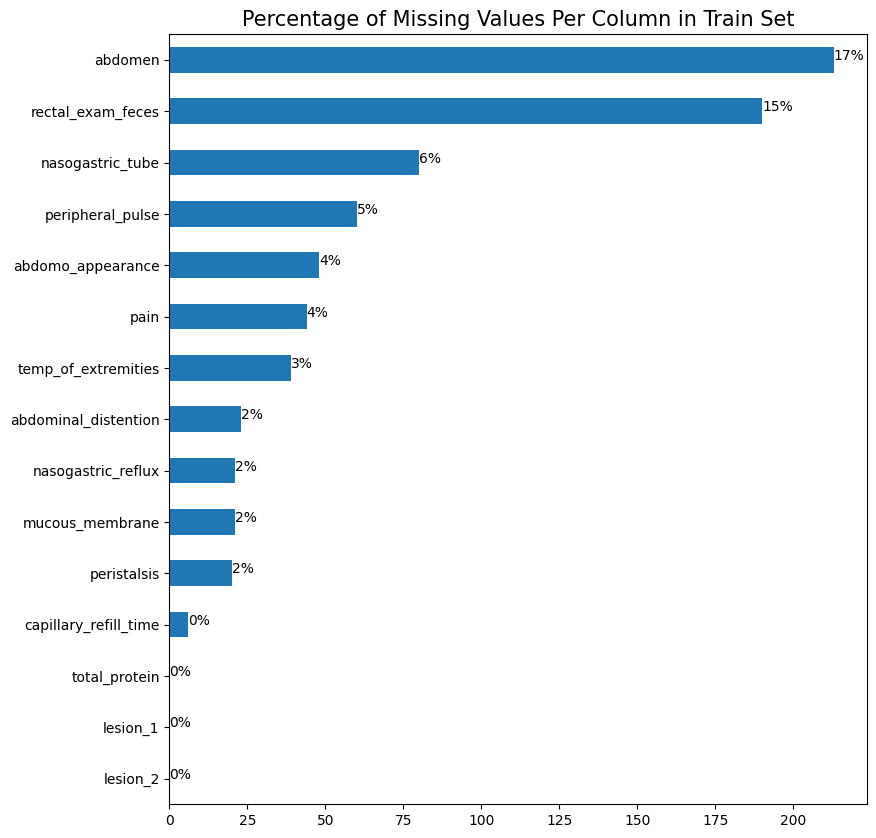

In [8]:
# Plot the percentage of missing values in training set
ax = data.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

The above graph includes all the columns having null values in the dataset and their corresponding percentage of null values

The above columns have less than 20% null values. So we will drop the rows having null values in them

# Data Cleaning

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

Now there are no null values present in the dataset

Lets also check for any duplicate values

In [11]:
data.duplicated().sum()

0

There are no duplicated values in our dataset 

## Dropping Columns

Now Hospital_Number is an id and in real-world wouldn't serve any purpose in our predictions.So we will drop the column

In [12]:
data.drop(columns='hospital_number',axis=1,inplace=True)

## Dealing with Categorical Data

Lets check the target variable 'outcome'

In [13]:
data['outcome'].value_counts()

outcome
lived         383
died          281
euthanized    107
Name: count, dtype: int64

As we can see there are three possibilities for the outcome : 'lived','died'and 'euthanized' We will map these values to numbers

In [14]:
data['outcome'] = data['outcome'].map({'lived': 0, 'died': 1, 'euthanized': 2})

Now lets check the categorical column in our dataset 

In [15]:
data_categorical_list = list(data.select_dtypes(include='object'))

In [16]:
data_categorical_list

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']

Lets Check the Target Variable 'Outcome'

In [17]:
data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,1
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,2
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,0
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,0
5,no,adult,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,depressed,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,0


## Ordinal Encoding

We will perform ordinal encoding on the categorical coumns to convert them into appropriate data that can be fed to our model

In [18]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)

In [19]:
data[data_categorical_list] = encoder.fit_transform(data[data_categorical_list])

In [20]:
data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,38.1,132.0,24.0,1.0,3.0,2.0,2.0,1.0,...,57.0,8.5,2.0,3.4,1.0,2209,0,0,0.0,1
1,1.0,0.0,37.5,88.0,12.0,1.0,2.0,4.0,2.0,3.0,...,33.0,64.0,2.0,2.0,1.0,2208,0,0,0.0,2
3,1.0,0.0,37.1,72.0,30.0,0.0,3.0,5.0,2.0,3.0,...,53.0,7.0,1.0,3.9,1.0,2208,0,0,1.0,0
4,0.0,0.0,38.0,52.0,48.0,2.0,2.0,3.0,1.0,0.0,...,47.0,7.3,1.0,2.6,0.0,0,0,0,1.0,0
5,0.0,0.0,38.1,56.0,32.0,2.0,2.0,0.0,1.0,1.0,...,49.0,8.0,1.0,2.8,0.0,0,0,0,1.0,0


# Data Visualization

### Heatmap

Text(0.5, 1.0, 'Heatmap or Correlation Matrix Plot of Dataset')

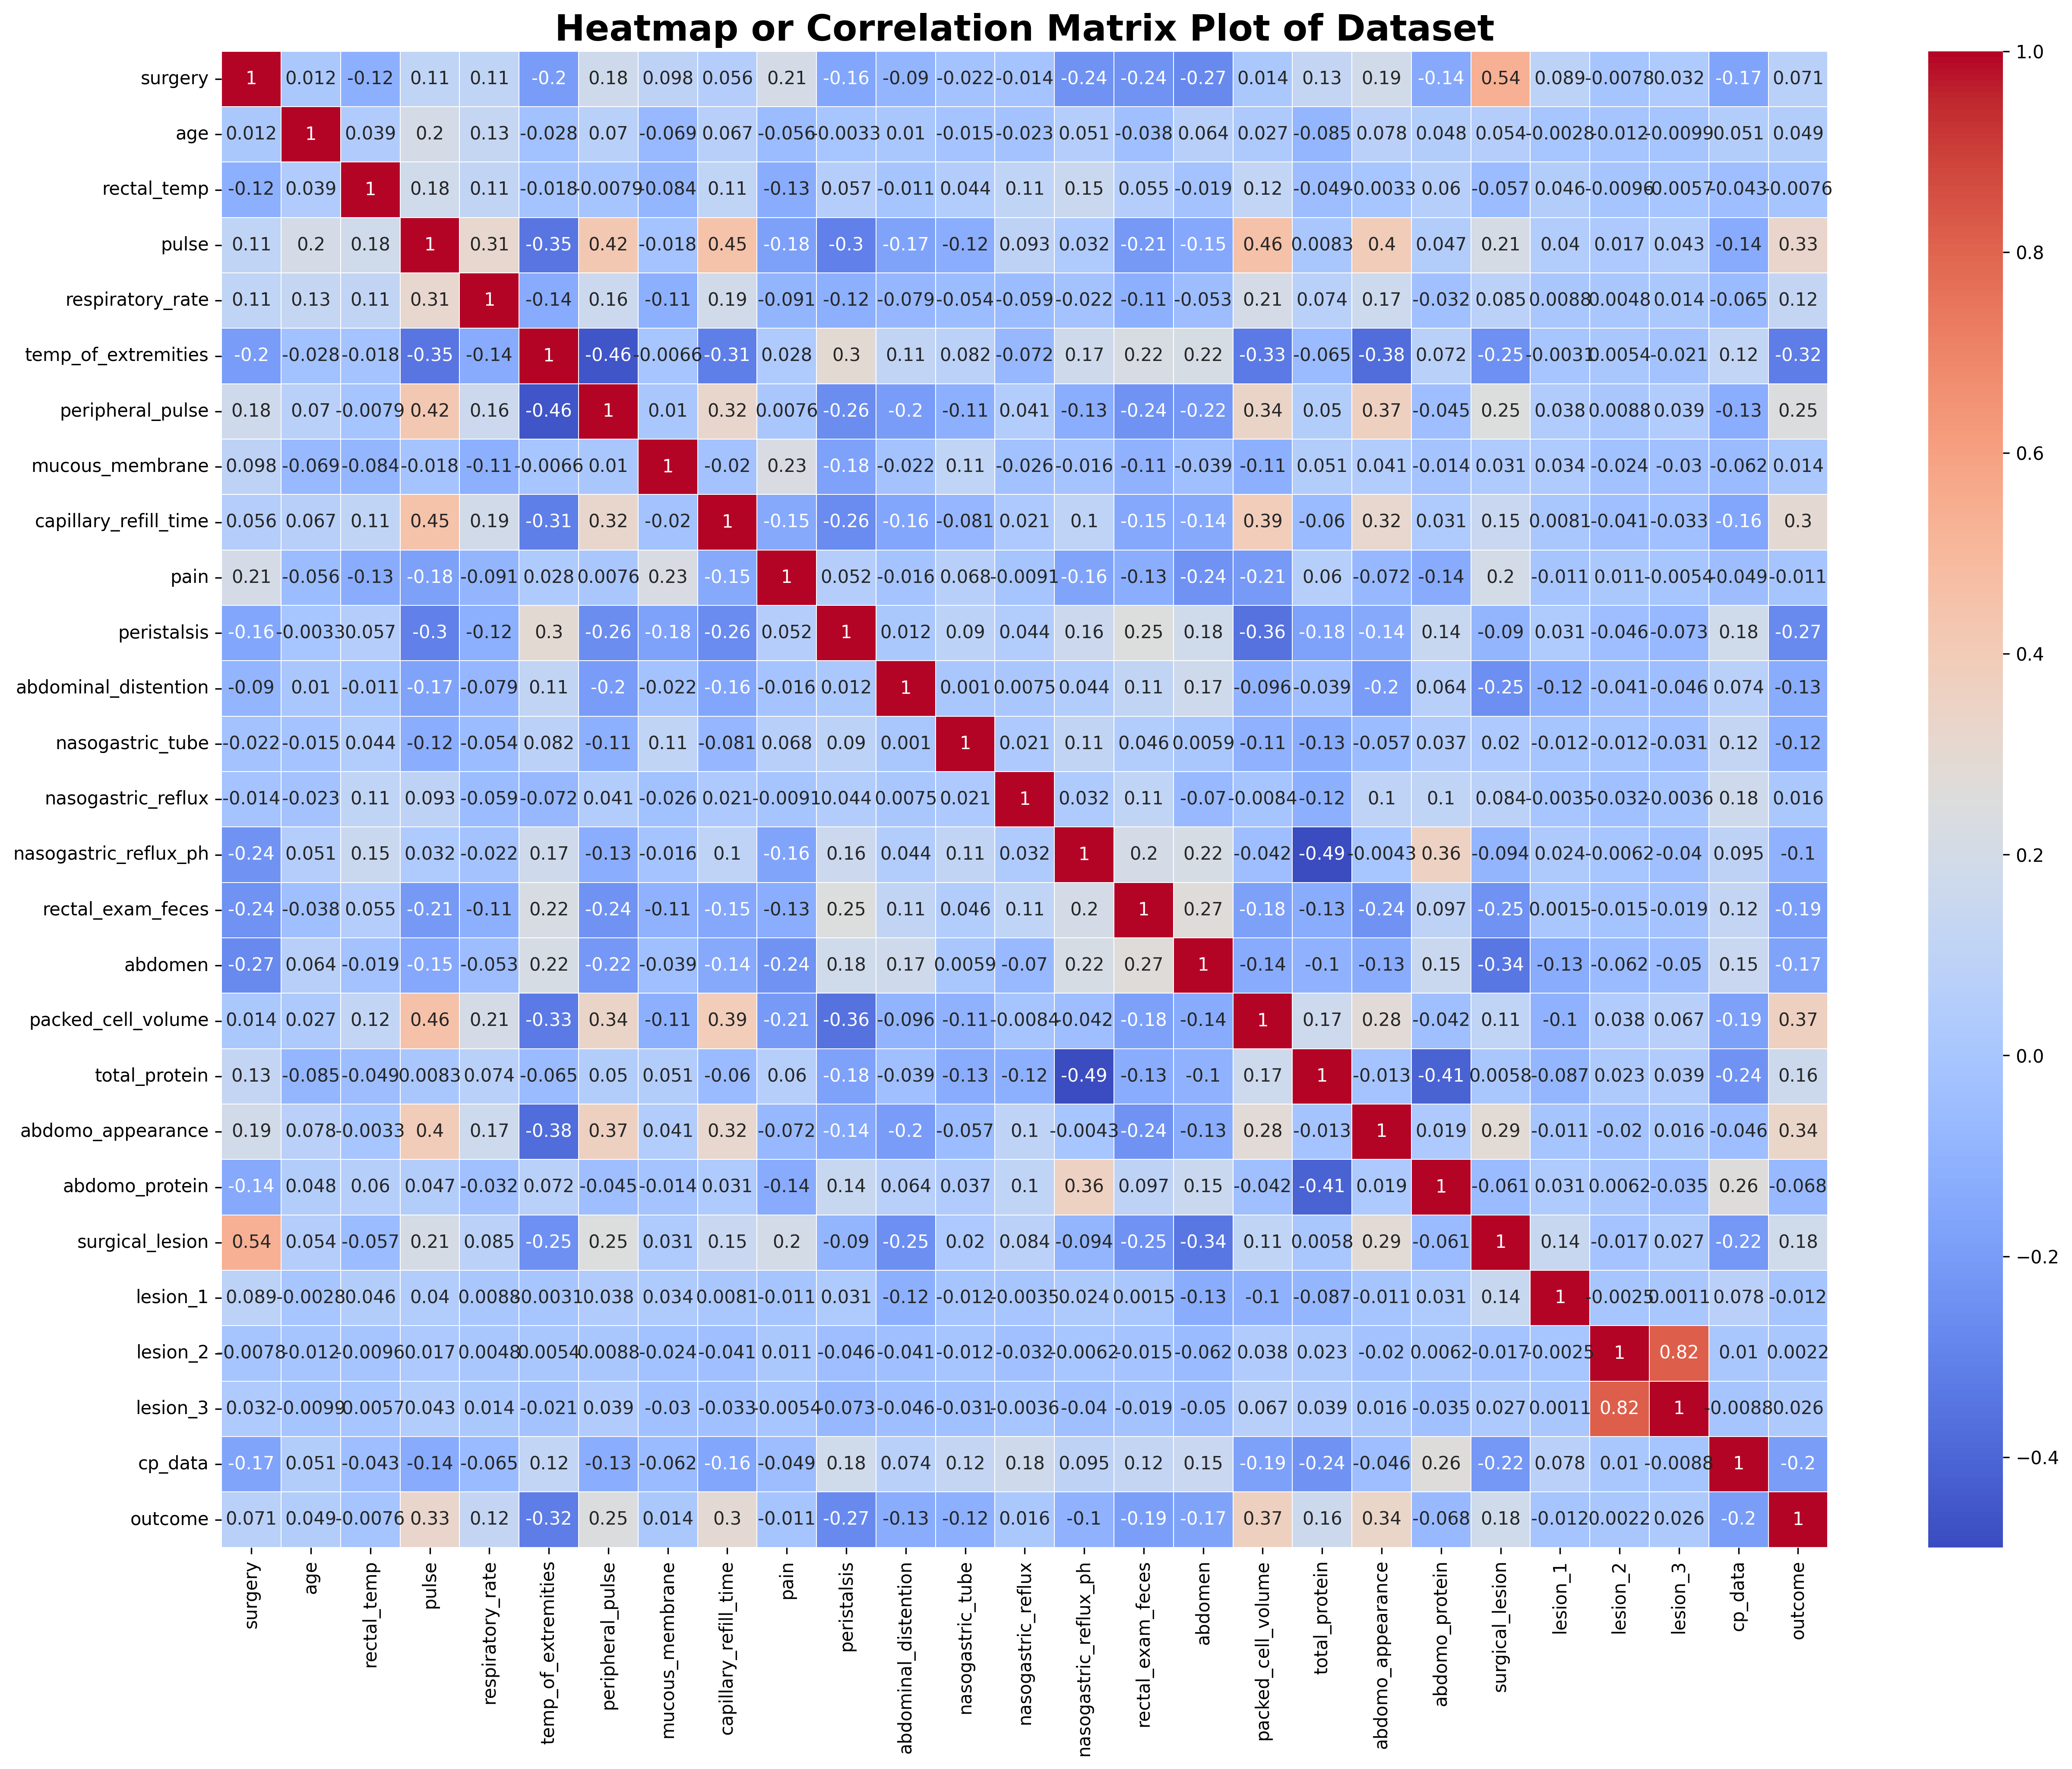

In [21]:
plt.figure(figsize = (20, 15), dpi = 300)
corr=data.corr()
sns.heatmap(corr,cmap='coolwarm',linewidths = .1,annot=True)
plt.title('Heatmap or Correlation Matrix Plot of Dataset', fontsize = 20, fontweight = 'bold')

### Countplot of Target Variable

([<matplotlib.axis.XTick at 0x7b5109267790>,
 [Text(0, 0, 'lived'), Text(1, 0, 'died'), Text(2, 0, 'euthanized')])

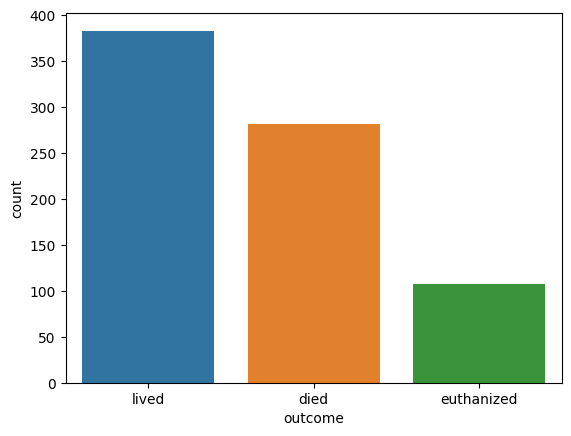

In [22]:
sns.countplot(data=data,x='outcome')
plt.xticks([0,1,2],['lived','died','euthanized'])

### Scatterplot of Respiratory_rate vs Pulse

<Axes: xlabel='respiratory_rate', ylabel='pulse'>

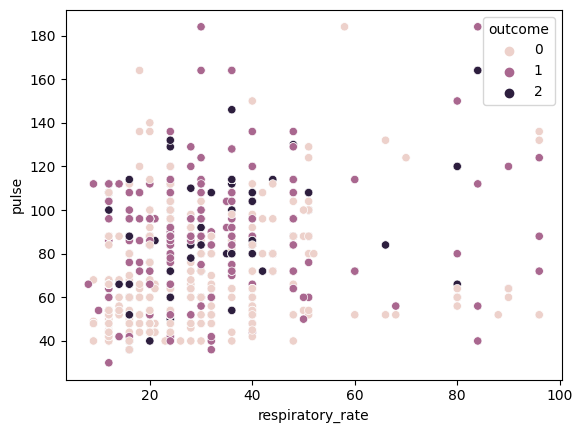

In [23]:
sns.scatterplot(data=data,y='pulse',x='respiratory_rate',hue='outcome')

# Model Training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [25]:
X=data.drop('outcome',axis=1)
y=data['outcome']

We will create a function train_and_evaluate_models() that return the model name and F1-score value for each model

In [26]:
def train_and_evaluate_models(X, y, models):
    results = []
    
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model in models:
        model_name = model.__class__.__name__
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate F1-score
        score = f1_score(y_test, y_pred,average='micro')
        
        results.append((model_name, score))
    
    return results

In [27]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    MultinomialNB(),
    SGDClassifier(),
    KNeighborsClassifier(),
    LGBMClassifier()
]

In [28]:
# Calling the function with the data and models
results = train_and_evaluate_models(X, y, models)

# Printing the results
for model_name, score in results:
    print(f"{model_name}: F1-score = {score:.2f}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: F1-score = 0.67
DecisionTreeClassifier: F1-score = 0.61
RandomForestClassifier: F1-score = 0.73
SVC: F1-score = 0.54
GradientBoostingClassifier: F1-score = 0.68
XGBClassifier: F1-score = 0.75
GaussianNB: F1-score = 0.43
MultinomialNB: F1-score = 0.44
SGDClassifier: F1-score = 0.42
KNeighborsClassifier: F1-score = 0.65
LGBMClassifier: F1-score = 0.74


Following were the micro-averaged F1-score values for the models that were executed. All of the models were trained on the dataset without any hyperparameter tunung: 

1) LogisticRegression : 0.67

2) DecisionTreeClasifier: 0.65

3) RandomForestClassifier: 0.71

4) XGBClassifier: 0.75

5) SVC : 0.54

6) GradientBoostingClassifier : 0.70

8) GaussianNB: F1-score = 0.43

9) MultinomialNB: F1-score = 0.44

10) SGDClassifier: F1-score = 0.42

11) KNeighborsClassifier: F1-score = 0.65

12) LGBMClassifier: F1-score = 0.74

As we can see from the micro averaged F1-values, the XGB,LGBM and Random Forest Classifier models gave the best value without any hyperparameter tuning. So we will select the models for our Ensemble Training.

So we will now train the model on the full Training Dataset

# Hyperparameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGB Hyperparameter Tuning

In [31]:
XGB = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1]
}

# Create the GridSearchCV object with cross-validation
random_search = RandomizedSearchCV(estimator=XGB,param_distributions=param_dist,n_iter=20, cv=5, scoring='f1_micro', n_jobs=-1, random_state=42)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_micro')

In [32]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}


In [33]:
best_XGB=XGBClassifier(**best_params)
best_XGB.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### LGBM Hyperparameter Tuning

In [34]:
# Define the LightGBM classifier
lgbm = LGBMClassifier()

# Define the hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1]
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(estimator=lgbm,param_distributions=param_dist,n_iter=20, scoring='f1_micro', cv=5, n_jobs=-1, random_state=42)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 10, 15],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_micro')

In [35]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}


In [36]:
# Train the LightGBM classifier with the best hyperparameters
best_lgbm = LGBMClassifier(**best_params)
best_lgbm.fit(X,y)


LGBMClassifier(max_depth=10)

### Random Forest Classifier Hyperparameter tuning

In [37]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,n_iter=20, scoring='f1_micro', cv=5,n_jobs=-1,random_state=42)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)




RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_micro')

In [38]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}


In [39]:
# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

# Predictions on Test Data

## Exploring Test Dataset

In [40]:
test_data=pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv',index_col=0)
test_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
id,,,,,,,,,,,,,,,,,,,,,
1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,less_3_sec,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1235 to 2058
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                824 non-null    object 
 1   age                    824 non-null    object 
 2   hospital_number        824 non-null    int64  
 3   rectal_temp            824 non-null    float64
 4   pulse                  824 non-null    float64
 5   respiratory_rate       824 non-null    float64
 6   temp_of_extremities    789 non-null    object 
 7   peripheral_pulse       777 non-null    object 
 8   mucous_membrane        811 non-null    object 
 9   capillary_refill_time  818 non-null    object 
 10  pain                   795 non-null    object 
 11  peristalsis            805 non-null    object 
 12  abdominal_distention   802 non-null    object 
 13  nasogastric_tube       760 non-null    object 
 14  nasogastric_reflux     810 non-null    object 
 15  nasogas

In [42]:
test_data.drop(columns='hospital_number',axis=1,inplace=True)

In [43]:
test_data[data_categorical_list] = encoder.transform(test_data[data_categorical_list],)
#test_data.fillna(-1, inplace=True)  # Replace NaN (new values) with -1

## Predictions on the Test Dataset

### XGB

In [44]:
xgb_predictions = best_XGB.predict(test_data)

In [45]:
Model_xgb = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')
Model_xgb['outcome'] = xgb_predictions
Model_xgb['outcome'] = Model_xgb['outcome'].map({0:'lived', 1:'died', 2:'euthanized'})

### LGBM

In [46]:
lgbm_predictions = best_lgbm.predict(test_data)

In [47]:
Model_lgbm = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')
Model_lgbm['outcome'] = lgbm_predictions
Model_lgbm['outcome'] = Model_lgbm['outcome'].map({0:'lived', 1:'died', 2:'euthanized'})

### Random Forest Classifier

In [48]:
rfc_predictions=best_rf_classifier.predict(test_data)

In [49]:
Model_rfc = pd.read_csv('/kaggle/input/playground-series-s3e22/sample_submission.csv')
Model_rfc['outcome'] = rfc_predictions
Model_rfc['outcome'] = Model_rfc['outcome'].map({0:'lived', 1:'died', 2:'euthanized'})

## Ensemble Learning

In [50]:
import statistics as st

In [51]:
# Create a dataframe with all predictions
ensemble = pd.DataFrame({'xgb':Model_xgb['outcome'], 
                         'lgbm':Model_lgbm['outcome'], 
                         'rfc':Model_rfc['outcome']})


In [52]:
#use the mode of each prediction for ensemble submission
ensemble_prediction = []
for ind,row in ensemble.iterrows():
    ensemble_prediction.append(st.mode(row))

## Final Submission

In [53]:
output = pd.DataFrame({'id':test_data.index,
                      'outcome':ensemble_prediction })
output.to_csv('submission.csv',index=False)